In [1]:
#Librerie e funzioni importate
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
#Caricamento e analisi iniziale dei dati
data = pd.read_csv('movie_info.csv')
print(data.head())

                          movie_title  release_date  season  phase  \
0                            Iron Man    May 2 2008       1      1   
1                 The Incredible Hulk  June 13 2008       1      1   
2                          Iron Man 2    May 7 2010       1      1   
3                                Thor    May 6 2011       1      1   
4  Captain America: The First Avenger  July 22 2011       2      1   

   production_budget_in_million_(USD)  worldwide_collection_in_million_(USD)  \
0                                 140                                 585.37   
1                                 150                                 264.77   
2                                 200                                 623.93   
3                                 150                                 449.33   
4                                 140                                 370.57   

   tomatometer  tomato_audience_score  imdb  metascore  meta_user_score  
0          9.4          

In [3]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   movie_title                            27 non-null     object 
 1   release_date                           27 non-null     object 
 2   season                                 27 non-null     int64  
 3   phase                                  27 non-null     int64  
 4   production_budget_in_million_(USD)     27 non-null     int64  
 5   worldwide_collection_in_million_(USD)  27 non-null     float64
 6   tomatometer                            27 non-null     float64
 7   tomato_audience_score                  27 non-null     float64
 8   imdb                                   27 non-null     float64
 9   metascore                              27 non-null     float64
 10  meta_user_score                        27 non-null     float64
dtypes: float

In [4]:
# Calcolo della matrice di correlazione
corr_matrix = data.corr()

/var/folders/49/n3vkdrd17nl5pvhy2gk6wcf00000gn/T/ipykernel_26218/143808436.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


In [5]:
# Seleziona solo le correlazioni relative alla variabile target
target_corr = corr_matrix['worldwide_collection_in_million_(USD)']

In [6]:
# Stabilisce una soglia di correlazione (ad esempio, 0.1)
threshold = 0.1

In [7]:
# Seleziona le colonne con una correlazione superiore alla soglia
selected_columns = target_corr[abs(target_corr) > threshold].index

In [8]:
# Mantiene solo le colonne selezionate nel dataset
data = data[selected_columns]

In [9]:
# Preparazione del dataset
X = data.drop('worldwide_collection_in_million_(USD)', axis=1)
y = data['worldwide_collection_in_million_(USD)']

In [10]:
# Divisione in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [11]:
# Modelli da confrontare
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Machine': SVR(),
    'Decision Tree': DecisionTreeRegressor(random_state=5),
    'Random Forest': RandomForestRegressor(random_state=5),
}

In [12]:
# Addestramento e valutazione dei modelli
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f'{name} RMSE: {rmse}')

Linear Regression RMSE: 449.6345533045107
Support Vector Machine RMSE: 369.14936399661167
Decision Tree RMSE: 298.9075122564392
Random Forest RMSE: 298.77724442345027


In [13]:
# Cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
    print(f'{name} CV RMSE: {-scores.mean()}')

Linear Regression CV RMSE: 426.493612059565
Support Vector Machine CV RMSE: 562.1029605916766
Decision Tree CV RMSE: 442.1337725174905
Random Forest CV RMSE: 444.53806722398224


In [14]:
# Definizione della griglia di parametri per l'ottimizzazione degli iperparametri
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [15]:
# Ottimizzazione degli iperparametri con ricerca esaustiva Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X, y)
print('Best parameters:', grid_search.best_params_)

/Users/franciu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/franciu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/franciu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it i

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}


In [16]:
# Addestramento e valutazione del modello ottimizzato
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'{name} RMSE: {rmse}')
    print(f'{name} MSE: {mse}')
    print(f'{name} R²: {r2}')
    print()

Linear Regression RMSE: 449.6345533045107
Linear Regression MSE: 202171.23152534684
Linear Regression R²: -0.5421440465249703

Support Vector Machine RMSE: 369.14936399661167
Support Vector Machine MSE: 136271.2529391029
Support Vector Machine R²: -0.039464912228072135

Decision Tree RMSE: 298.9075122564392
Decision Tree MSE: 89345.70088333334
Decision Tree R²: 0.31847899594676554

Random Forest RMSE: 298.77724442345027
Random Forest MSE: 89267.84178527014
Random Forest R²: 0.3190728981733092



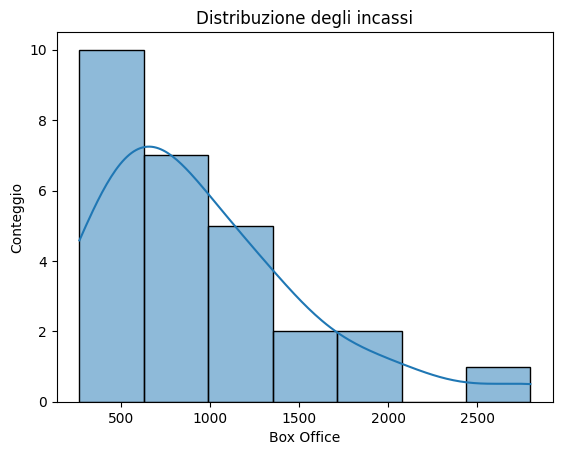

In [17]:
# Distribuzione degli incassi
sns.histplot(data['worldwide_collection_in_million_(USD)'], kde=True)
plt.xlabel('Box Office')
plt.ylabel('Conteggio')
plt.title('Distribuzione degli incassi')
plt.show()

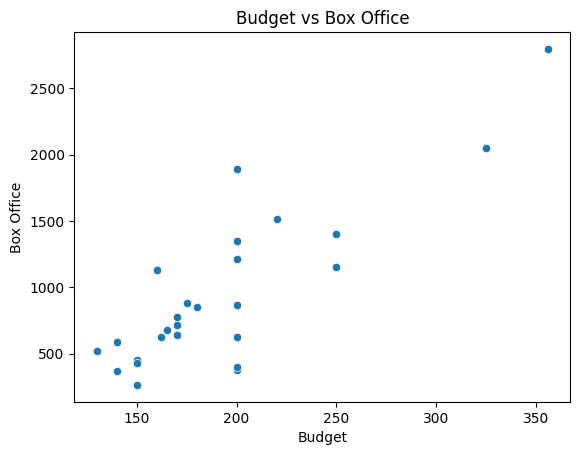

In [18]:
# Scatterplot tra budget e incasso
sns.scatterplot(x=data['production_budget_in_million_(USD)'], y=data['worldwide_collection_in_million_(USD)'])
plt.xlabel('Budget')
plt.ylabel('Box Office')
plt.title('Budget vs Box Office')
plt.show()

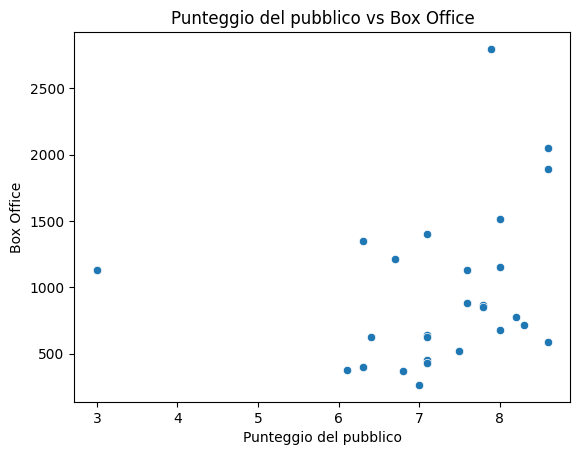

In [19]:
# Scatterplot tra valutazione degli spettatori e incasso
sns.scatterplot(x=data['meta_user_score'], y=data['worldwide_collection_in_million_(USD)'])
plt.xlabel('Punteggio del pubblico')
plt.ylabel('Box Office')
plt.title('Punteggio del pubblico vs Box Office')
plt.show()

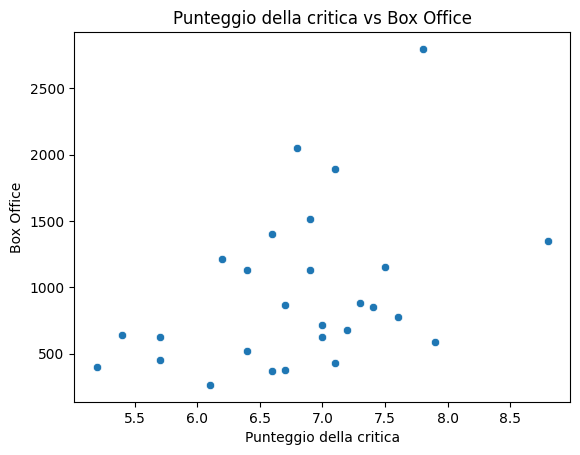

In [20]:
# Scatterplot tra valutazione della critica e incasso
sns.scatterplot(x=data['metascore'], y=data['worldwide_collection_in_million_(USD)'])
plt.xlabel('Punteggio della critica')
plt.ylabel('Box Office')
plt.title('Punteggio della critica vs Box Office')
plt.show()